In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
from keras.layers import Dense, Activation, Input
from keras.models import Model
from keras.utils import np_utils

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
ds = pd.read_csv('/home/ayush/Documents/mnist_train.csv')
data = ds.values[1000:9000,1:]/255.0
print data.shape

(8000, 784)


In [10]:
## Model in Keras
inp = Input(shape=(784,))
h1 = Dense(100)
a1 = Activation('sigmoid')
y = Dense(784)
ya = Activation('sigmoid')

y_out = ya(y(a1(h1(inp))))

model = Model(input=[inp], output=[y_out])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 100)           78500       input_3[0][0]                    
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 100)           0           dense_3[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 784)           79184       activation_3[0][0]               
___________________________________________________________________________________________

In [11]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

In [12]:
split = int(0.8*data.shape[0])
print split
print data.shape

6400
(8000, 784)


In [13]:
model.fit(data[:split], data[:split], batch_size=15, nb_epoch=50, verbose=2, validation_data=(data[split:], data[split:]))

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
2s - loss: 0.0686 - acc: 0.0122 - val_loss: 0.0559 - val_acc: 0.0169
Epoch 2/50
2s - loss: 0.0477 - acc: 0.0173 - val_loss: 0.0423 - val_acc: 0.0150
Epoch 3/50
2s - loss: 0.0377 - acc: 0.0153 - val_loss: 0.0350 - val_acc: 0.0106
Epoch 4/50
2s - loss: 0.0316 - acc: 0.0108 - val_loss: 0.0301 - val_acc: 0.0106
Epoch 5/50
2s - loss: 0.0273 - acc: 0.0088 - val_loss: 0.0264 - val_acc: 0.0063
Epoch 6/50
2s - loss: 0.0240 - acc: 0.0094 - val_loss: 0.0235 - val_acc: 0.0100
Epoch 7/50
2s - loss: 0.0213 - acc: 0.0113 - val_loss: 0.0211 - val_acc: 0.0100
Epoch 8/50
2s - loss: 0.0191 - acc: 0.0105 - val_loss: 0.0190 - val_acc: 0.0094
Epoch 9/50
2s - loss: 0.0172 - acc: 0.0114 - val_loss: 0.0173 - val_acc: 0.0088
Epoch 10/50
2s - loss: 0.0156 - acc: 0.0128 - val_loss: 0.0158 - val_acc: 0.0106
Epoch 11/50
2s - loss: 0.0142 - acc: 0.0141 - val_loss: 0.0146 - val_acc: 0.0113
Epoch 12/50
2s - loss: 0.0131 - acc: 0.0139 - val_loss: 0.0136 - val_a

In [8]:
## Encoder
a2 = Activation('sigmoid')
enc_out = a2(h1(inp))
encoder = Model(input=[inp], output=[enc_out])

## Decoder
dec_inp = Input(shape=(100,))
dec_out = ya(y(a1(dec_inp)))
decoder = Model(input=[dec_inp], output=[dec_out])

In [18]:
data_pred = data[:1000]
print data_pred.shape
ex = encoder.predict(data_pred)
print ex.shape

dx = decoder.predict(ex)
print dx.shape

(1000, 784)
(1000, 100)
(1000, 784)


502


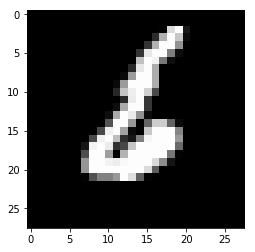

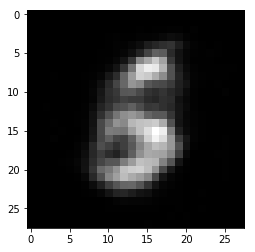

In [21]:
n = np.random.choice(1000)
print n
plt.imshow(data[n].reshape((28, 28)), cmap='gray')
plt.show()
plt.imshow(dx[n].reshape((28, 28)), cmap='gray')
plt.show()